# <span style="color:Orange">Analisis de sentimientos twitter sobre San Andrés Islas</span>

# El siguiente informe trata sobre la recolección de datos de twitter mediante la utilización del api y su respectivo analisis de sentimientos

## Motivación : Encontrar tendencias en la opinion de las personas a raiz de los sucedido en los últimos dias en la Isla de San Andrés por el Huracán



### <span style="color:Orange">Primera parte : Recolección de datos</span>

#### Se importan la librerias pandas y Tweepy para la mineria de datos requerida y la utilización del api

In [1]:
import pandas as pd 
import tweepy

#### Se cargan las llaves para utilizar el api

In [2]:
# Leer llaves
keys = pd.read_csv("keys.csv", header=None,sep =";")
keys = dict(zip(keys[0],keys[1]))


#### Autorizar las llaves a traves del api

In [3]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_key_secret'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

#### Se inserta el query de busqueda , en este caso los parametros serán 
* San Andrés
* Colombia
* No incluye RT

In [34]:
tweets = tweepy.Cursor(api.search,
                       q=["San Andrés"],
                       lang='es',
                       geocode=f'4.570868,-74.297333,30mi',
                       tweet_mode='extended',
                       include_rts=False).items(3000)

#### Guardamos los datos de la consulta en un dataframe que adicional contiene:
* Fecha de creación
* Pais Colombia
* Ubicación del usuario
* Id del tweet
* Url del Tweet

In [35]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Colombia")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

#### Se renonmbran las columnas y se muestran los primeros registros del dataset

In [36]:
data = pd.DataFrame(t)
data.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
data.head(50)

,tweet,date,city,user_location,id,link
0,RT @andreanimalidad: ¡Los animales de San Andr...,2020-11-27 23:39:24,Colombia,Bogota,1332469099964850176,https://twitter.com/i/web/status/1332469099964...
1,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:39:23,Colombia,Barranquilla,1332469097574129664,https://twitter.com/i/web/status/1332469097574...
2,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:37:59,Colombia,Colombia,1332468746196283393,https://twitter.com/i/web/status/1332468746196...
3,"RT @USEmbassyBogota: ""En una semana, Estados U...",2020-11-27 23:37:10,Colombia,Colombia,1332468539891081219,https://twitter.com/i/web/status/1332468539891...
4,RT @USEmbassyBogota: “El pueblo de Estados Uni...,2020-11-27 23:36:00,Colombia,,1332468246663098371,https://twitter.com/i/web/status/1332468246663...
5,#SOSSanAndres El gobierno reconoció que no hay...,2020-11-27 23:35:41,Colombia,Bogotá,1332468166451146755,https://twitter.com/i/web/status/1332468166451...
6,"RT @LilithFallen: Amigos, un mensaje con todo ...",2020-11-27 23:34:54,Colombia,Bgt 27/10/12 Medellin 23/11/16,1332467968282927105,https://twitter.com/i/web/status/1332467968282...
7,Presidente @IvanDuque \ninforma que las ayudas...,2020-11-27 23:32:25,Colombia,colombia,1332467346003386371,https://twitter.com/i/web/status/1332467346003...
8,"#ReporteCovid19 ""En San Andrés ya se tiene def...",2020-11-27 23:31:47,Colombia,"Bogotá, Colombia",1332467182618497025,https://twitter.com/i/web/status/1332467182618...
9,El paso del devastador huracán Iota por el arc...,2020-11-27 23:30:09,Colombia,Bogotá - Colombia,1332466773329924107,https://twitter.com/i/web/status/1332466773329...


#### Detalle del dataframe

In [37]:
data.shape

(3000, 6)

### <span style="color:Orange">Segunda parte : Limpieza de datos, separar links|Hashtags|Menciones</span>

In [38]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [39]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')

data.head()

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions
0,RT @andreanimalidad: ¡Los animales de San Andr...,2020-11-27 23:39:24,Colombia,Bogota,1332469099964850176,https://twitter.com/i/web/status/1332469099964...,"RT ¡Los animales de San Andrés y Providencia,...",[],"[#HuracánIota,]",[@andreanimalidad:]
1,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:39:23,Colombia,Barranquilla,1332469097574129664,https://twitter.com/i/web/status/1332469097574...,"RT El Departamento de Defensa apoya, con más...",[],[],"[@USEmbassyBogota:, @DeptofDefense]"
2,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:37:59,Colombia,Colombia,1332468746196283393,https://twitter.com/i/web/status/1332468746196...,"RT El Departamento de Defensa apoya, con más...",[],[],"[@USEmbassyBogota:, @DeptofDefense]"
3,"RT @USEmbassyBogota: ""En una semana, Estados U...",2020-11-27 23:37:10,Colombia,Colombia,1332468539891081219,https://twitter.com/i/web/status/1332468539891...,"RT ""En una semana, Estados Unidos ha contribu...",[],[],[@USEmbassyBogota:]
4,RT @USEmbassyBogota: “El pueblo de Estados Uni...,2020-11-27 23:36:00,Colombia,,1332468246663098371,https://twitter.com/i/web/status/1332468246663...,RT “El pueblo de Estados Unidos se solidariza...,[],[],[@USEmbassyBogota:]


#### Y desde luego los emojis 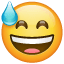 

In [40]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

data['emojis'] = data['clean'].apply(lambda text: get_emojis(text))

In [41]:
data.head()

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,emojis
0,RT @andreanimalidad: ¡Los animales de San Andr...,2020-11-27 23:39:24,Colombia,Bogota,1332469099964850176,https://twitter.com/i/web/status/1332469099964...,"RT ¡Los animales de San Andrés y Providencia,...",[],"[#HuracánIota,]",[@andreanimalidad:],[👇]
1,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:39:23,Colombia,Barranquilla,1332469097574129664,https://twitter.com/i/web/status/1332469097574...,"RT El Departamento de Defensa apoya, con más...",[],[],"[@USEmbassyBogota:, @DeptofDefense]",[]
2,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:37:59,Colombia,Colombia,1332468746196283393,https://twitter.com/i/web/status/1332468746196...,"RT El Departamento de Defensa apoya, con más...",[],[],"[@USEmbassyBogota:, @DeptofDefense]",[]
3,"RT @USEmbassyBogota: ""En una semana, Estados U...",2020-11-27 23:37:10,Colombia,Colombia,1332468539891081219,https://twitter.com/i/web/status/1332468539891...,"RT ""En una semana, Estados Unidos ha contribu...",[],[],[@USEmbassyBogota:],[]
4,RT @USEmbassyBogota: “El pueblo de Estados Uni...,2020-11-27 23:36:00,Colombia,,1332468246663098371,https://twitter.com/i/web/status/1332468246663...,RT “El pueblo de Estados Unidos se solidariza...,[],[],[@USEmbassyBogota:],[]


### <span style="color:Orange">Tercera parte : Analisis de sentimientos con Vader</span>
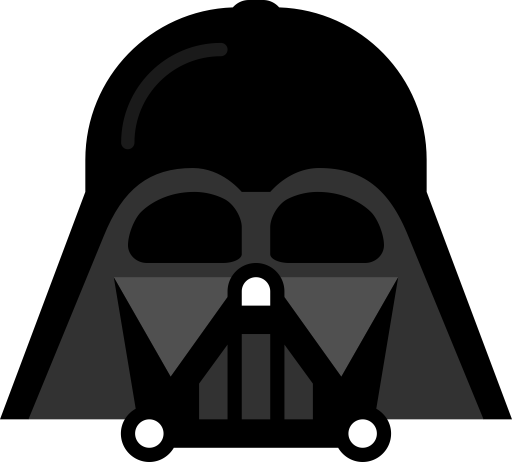


In [42]:
from googletrans import Translator
translator = Translator()

In [44]:
#data['ing']=data['clean'].apply(lambda valor:translator.translate(valor, src='es', dest='en'))

data['ing'] = data['clean'].apply(lambda valor:translator.translate(valor,src='es', dest='en'))

In [45]:
data.head()

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,emojis,ing
0,RT @andreanimalidad: ¡Los animales de San Andr...,2020-11-27 23:39:24,Colombia,Bogota,1332469099964850176,https://twitter.com/i/web/status/1332469099964...,"RT ¡Los animales de San Andrés y Providencia,...",[],"[#HuracánIota,]",[@andreanimalidad:],[👇],"Translated(src=es, dest=en, text=RT The animal..."
1,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:39:23,Colombia,Barranquilla,1332469097574129664,https://twitter.com/i/web/status/1332469097574...,"RT El Departamento de Defensa apoya, con más...",[],[],"[@USEmbassyBogota:, @DeptofDefense]",[],"Translated(src=es, dest=en, text=RT The Depart..."
2,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:37:59,Colombia,Colombia,1332468746196283393,https://twitter.com/i/web/status/1332468746196...,"RT El Departamento de Defensa apoya, con más...",[],[],"[@USEmbassyBogota:, @DeptofDefense]",[],"Translated(src=es, dest=en, text=RT The Depart..."
3,"RT @USEmbassyBogota: ""En una semana, Estados U...",2020-11-27 23:37:10,Colombia,Colombia,1332468539891081219,https://twitter.com/i/web/status/1332468539891...,"RT ""En una semana, Estados Unidos ha contribu...",[],[],[@USEmbassyBogota:],[],"Translated(src=es, dest=en, text=RT ""In one we..."
4,RT @USEmbassyBogota: “El pueblo de Estados Uni...,2020-11-27 23:36:00,Colombia,,1332468246663098371,https://twitter.com/i/web/status/1332468246663...,RT “El pueblo de Estados Unidos se solidariza...,[],[],[@USEmbassyBogota:],[],"Translated(src=es, dest=en, text=RT “The peopl..."


#### Traducimos el texto ya que la libreria trabaja en ingles

In [48]:
data['ingles'] = data['ing'].apply(lambda valor: valor.text)
data.head()

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,emojis,ing,ingles
0,RT @andreanimalidad: ¡Los animales de San Andr...,2020-11-27 23:39:24,Colombia,Bogota,1332469099964850176,https://twitter.com/i/web/status/1332469099964...,"RT ¡Los animales de San Andrés y Providencia,...",[],"[#HuracánIota,]",[@andreanimalidad:],[👇],"Translated(src=es, dest=en, text=RT The animal...","RT The animals of San Andrés and Providencia, ..."
1,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:39:23,Colombia,Barranquilla,1332469097574129664,https://twitter.com/i/web/status/1332469097574...,"RT El Departamento de Defensa apoya, con más...",[],[],"[@USEmbassyBogota:, @DeptofDefense]",[],"Translated(src=es, dest=en, text=RT The Depart...","RT The Department of Defense supports, with mo..."
2,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:37:59,Colombia,Colombia,1332468746196283393,https://twitter.com/i/web/status/1332468746196...,"RT El Departamento de Defensa apoya, con más...",[],[],"[@USEmbassyBogota:, @DeptofDefense]",[],"Translated(src=es, dest=en, text=RT The Depart...","RT The Department of Defense supports, with mo..."
3,"RT @USEmbassyBogota: ""En una semana, Estados U...",2020-11-27 23:37:10,Colombia,Colombia,1332468539891081219,https://twitter.com/i/web/status/1332468539891...,"RT ""En una semana, Estados Unidos ha contribu...",[],[],[@USEmbassyBogota:],[],"Translated(src=es, dest=en, text=RT ""In one we...","RT ""In one week, the United States has contrib..."
4,RT @USEmbassyBogota: “El pueblo de Estados Uni...,2020-11-27 23:36:00,Colombia,,1332468246663098371,https://twitter.com/i/web/status/1332468246663...,RT “El pueblo de Estados Unidos se solidariza...,[],[],[@USEmbassyBogota:],[],"Translated(src=es, dest=en, text=RT “The peopl...",RT “The people of the United States stand in s...


In [49]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

#### Creamos una nueva columna que corresponde al analisis de sentimiento del Tweet

In [50]:
data['sentimiento'] = data['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,emojis,ing,ingles,sentimiento
0,RT @andreanimalidad: ¡Los animales de San Andr...,2020-11-27 23:39:24,Colombia,Bogota,1332469099964850176,https://twitter.com/i/web/status/1332469099964...,"RT ¡Los animales de San Andrés y Providencia,...",[],"[#HuracánIota,]",[@andreanimalidad:],[👇],"Translated(src=es, dest=en, text=RT The animal...","RT The animals of San Andrés and Providencia, ...",0.1260
1,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:39:23,Colombia,Barranquilla,1332469097574129664,https://twitter.com/i/web/status/1332469097574...,"RT El Departamento de Defensa apoya, con más...",[],[],"[@USEmbassyBogota:, @DeptofDefense]",[],"Translated(src=es, dest=en, text=RT The Depart...","RT The Department of Defense supports, with mo...",0.4588
2,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:37:59,Colombia,Colombia,1332468746196283393,https://twitter.com/i/web/status/1332468746196...,"RT El Departamento de Defensa apoya, con más...",[],[],"[@USEmbassyBogota:, @DeptofDefense]",[],"Translated(src=es, dest=en, text=RT The Depart...","RT The Department of Defense supports, with mo...",0.4588
3,"RT @USEmbassyBogota: ""En una semana, Estados U...",2020-11-27 23:37:10,Colombia,Colombia,1332468539891081219,https://twitter.com/i/web/status/1332468539891...,"RT ""En una semana, Estados Unidos ha contribu...",[],[],[@USEmbassyBogota:],[],"Translated(src=es, dest=en, text=RT ""In one we...","RT ""In one week, the United States has contrib...",0.4215
4,RT @USEmbassyBogota: “El pueblo de Estados Uni...,2020-11-27 23:36:00,Colombia,,1332468246663098371,https://twitter.com/i/web/status/1332468246663...,RT “El pueblo de Estados Unidos se solidariza...,[],[],[@USEmbassyBogota:],[],"Translated(src=es, dest=en, text=RT “The peopl...",RT “The people of the United States stand in s...,0.8720


In [51]:
data[['tweet', 'sentimiento']].sort_values('sentimiento')

,tweet,sentimiento
563,"RT @Lailusa___: Listo, ahora tengamosle luto t...",-0.8928
1363,@angelamrobledo @IvanDuque Esta bruja inepta h...,-0.8481
1093,Lo mejor que le pudo pasar al Gobierno y lo pe...,-0.8271
738,"Don't get me wrong, me encanta que la gente se...",-0.7948
1141,Será posible que no nos olvidemos que hace poc...,-0.7906
...,...,...
1614,San Andrés 💛💙❤️ Un destino maravilloso con muc...,0.9426
957,RT @MillanJanuario: @BluRadioCo Gracias por es...,0.9432
958,@BluRadioCo Gracias por esa gran donación para...,0.9432
316,San Andrés TE ESPERA 📢 con todas las ganas de ...,0.9459


### <span style="color:Orange">Cuarta parte : Analisis de sentimientos con Flair</span>

In [52]:
from flair.models import TextClassifier
from flair.data import Sentence
 
classifier = TextClassifier.load('en-sentiment')


2020-11-27 19:28:04,231 loading file C:\Users\jagir\.flair\models\sentiment-en-mix-distillbert_3.1.pt


#### Con el analisis se crea una nueva columna llamada sent_flair

In [53]:
classifier = TextClassifier.load('sentiment')
 
def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score
 
data['sent_flair'] = data['clean'].apply(lambda valor: sent_flair(valor))

data.head()

2020-11-27 19:28:17,273 loading file C:\Users\jagir\.flair\models\sentiment-en-mix-distillbert_3.1.pt


,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,emojis,ing,ingles,sentimiento,sent_flair
0,RT @andreanimalidad: ¡Los animales de San Andr...,2020-11-27 23:39:24,Colombia,Bogota,1332469099964850176,https://twitter.com/i/web/status/1332469099964...,"RT ¡Los animales de San Andrés y Providencia,...",[],"[#HuracánIota,]",[@andreanimalidad:],[👇],"Translated(src=es, dest=en, text=RT The animal...","RT The animals of San Andrés and Providencia, ...",0.1260,0.988319
1,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:39:23,Colombia,Barranquilla,1332469097574129664,https://twitter.com/i/web/status/1332469097574...,"RT El Departamento de Defensa apoya, con más...",[],[],"[@USEmbassyBogota:, @DeptofDefense]",[],"Translated(src=es, dest=en, text=RT The Depart...","RT The Department of Defense supports, with mo...",0.4588,0.961612
2,RT @USEmbassyBogota: El Departamento de Defens...,2020-11-27 23:37:59,Colombia,Colombia,1332468746196283393,https://twitter.com/i/web/status/1332468746196...,"RT El Departamento de Defensa apoya, con más...",[],[],"[@USEmbassyBogota:, @DeptofDefense]",[],"Translated(src=es, dest=en, text=RT The Depart...","RT The Department of Defense supports, with mo...",0.4588,0.961612
3,"RT @USEmbassyBogota: ""En una semana, Estados U...",2020-11-27 23:37:10,Colombia,Colombia,1332468539891081219,https://twitter.com/i/web/status/1332468539891...,"RT ""En una semana, Estados Unidos ha contribu...",[],[],[@USEmbassyBogota:],[],"Translated(src=es, dest=en, text=RT ""In one we...","RT ""In one week, the United States has contrib...",0.4215,0.978519
4,RT @USEmbassyBogota: “El pueblo de Estados Uni...,2020-11-27 23:36:00,Colombia,,1332468246663098371,https://twitter.com/i/web/status/1332468246663...,RT “El pueblo de Estados Unidos se solidariza...,[],[],[@USEmbassyBogota:],[],"Translated(src=es, dest=en, text=RT “The peopl...",RT “The people of the United States stand in s...,0.8720,0.996840


#### Se exporta a un excel todo el dataframe

In [54]:
data.to_excel("tweets_Sanandres.xlsx")

### <span style="color:Orange">Quinta parte : Visualización de datos</span>


In [55]:
import numpy as np
 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
 
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
 
import matplotlib.pyplot as plt
import PIL.Image

from IPython.display import display

#### Nube incial de palabras

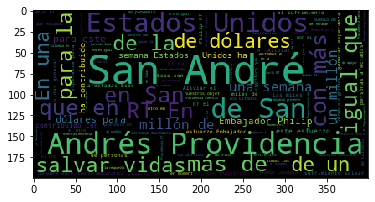

In [56]:
palabras = data.clean.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)
 
plt.imshow(wordcloud)
plt.show()


#### Se cargan las "stopwords" para eliminar palabras que no son concluyentes dentro del analisis

In [57]:
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

#### Se trabaja la nube de palabras con la bandera de san andres islas

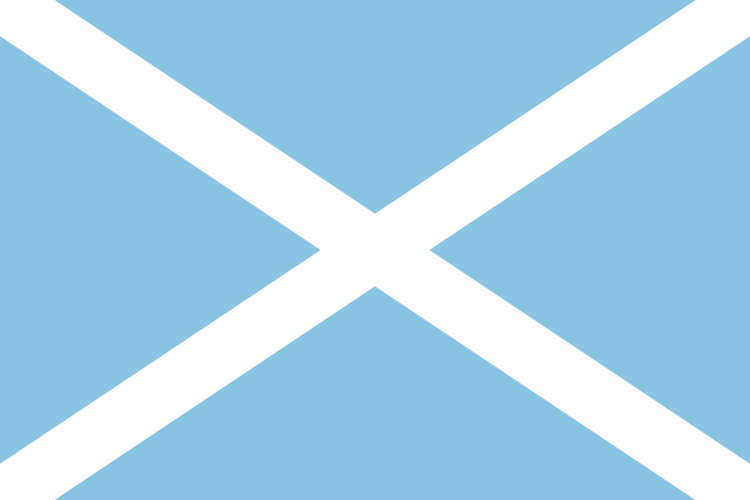

In [58]:
bandera = PIL.Image.open("Bandera.png")
display(bandera)

In [59]:
mask = np.array(bandera)
mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

#### Se genera la nube de palabras con la bandera

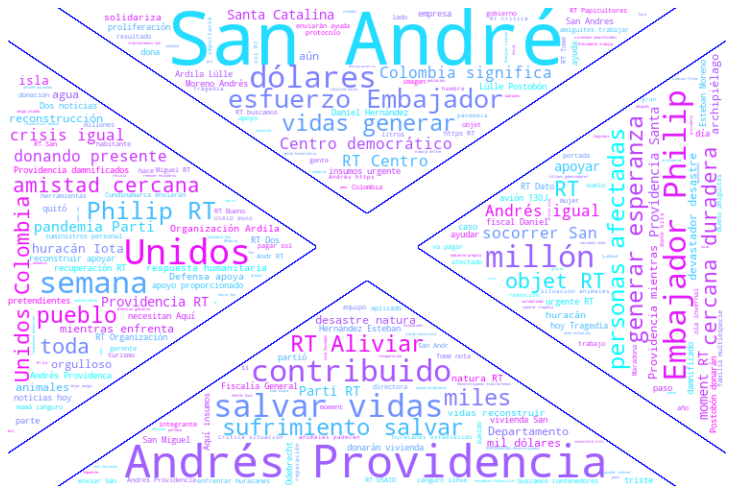

In [61]:
palabras = data.clean.str.cat(sep=' ')
 
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color='White', colormap='cool',
                      stopwords=stopwords,
                      mask=mask, contour_width=0.5, contour_color='blue').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
wordcloud.to_file("banderas.png")
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### <span style="color:Blue">En la nube de palabras se puede identificar  temas relacionados al huracán lota , la pandemia, la situación humanitaria y temas politicos </span>

#### Ahora un analisis de los emojis 

In [62]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [63]:
from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(data.emojis.values,[])).keys(),Counter(sum(data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head()

,emoji,cnt
0,👇,78
8,🔴,72
3,🇨🇴,56
40,❤️,49
7,📻,35


#### Se exportan estos datos a un libro de excel

In [64]:
temp_emojis.to_excel("temp_emojis.xlsx")

#### Se genera un grafico de barras para mostrar la utilización de emojis

In [65]:
trace = go.Bar(x=temp_emojis.emoji.values[:15],
               y=temp_emojis.cnt.values[:15])

layout = go.Layout(title='Emojis más usados')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### <span style="color:Blue">Al realizar una analisis a detalle , los emojis mas usados corresponden a noticias sobre la alerta del Huracan </span>


#### Ahora un analisis de mapa de calor para las palabras utlizando tdidf con sklearn

In [66]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado, ngram_range=(1,1), max_features=100)
tfidf = tfidf_vect.fit_transform(data.clean.values)


In [67]:
from sklearn.metrics.pairwise import cosine_similarity

voc = [k for k,v in sorted(tfidf_vect.vocabulary_.items(), key=lambda kv: kv[1])]
temp = pd.DataFrame(tfidf.toarray())
temp = cosine_similarity(temp.T.values)
temp = pd.DataFrame(temp)
temp.columns = voc
temp.index = voc
temp

,afectadas,agua,aliviar,amistad,andres,andrés,animales,apoya,apoyar,apoyo,...,socorrer,solidariza,sufrimiento,todas,tragedia,triste,unidos,urgente,vidas,vivienda
afectadas,1.000000,0.0,0.945624,0.000000,0.0,0.017302,0.000000,0.0,0.020415,0.000000,...,0.0,0.000000,0.948244,0.0,0.000000,0.0,0.000000,0.0,0.816489,0.0
agua,0.000000,1.0,0.000000,0.000000,0.0,0.095664,0.005611,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
aliviar,0.945624,0.0,1.000000,0.000000,0.0,0.000767,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.991471,0.0,0.015090,0.0,0.000000,0.0,0.853710,0.0
amistad,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.547685,0.0,0.000000,0.0
andres,0.000000,0.0,0.000000,0.000000,1.0,0.001316,0.000000,0.0,0.028820,0.049259,...,0.0,0.000000,0.000000,0.0,0.011583,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
triste,0.000000,0.0,0.000000,0.000000,0.0,0.092469,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.589512,1.0,0.000000,0.0,0.000000,0.0
unidos,0.000000,0.0,0.000000,0.547685,0.0,0.018369,0.000000,0.0,0.171781,0.014694,...,0.0,0.303166,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.161932,0.0
urgente,0.000000,0.0,0.000000,0.000000,0.0,0.086662,0.389525,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.0
vidas,0.816489,0.0,0.853710,0.000000,0.0,0.002027,0.000000,0.0,0.269916,0.000000,...,0.0,0.476358,0.861054,0.0,0.000000,0.0,0.161932,0.0,1.000000,0.0


In [68]:
trace = go.Heatmap(z=temp.values.tolist(),
                   x=temp.index.values,
                   y=temp.columns.values,
                   colorscale='Oranges')

layout = go.Layout(title='🔥 Mapa de calor entre palabras 🔥',
                   width=800, height=800)

fig = go.Figure(data=[trace],layout=layout)
iplot(fig)

In [69]:
import scipy.cluster.hierarchy as sch
import numpy as np

pairwise_distances = sch.distance.pdist(temp)
linkage = sch.linkage(pairwise_distances, method='ward')
idx_to_cluster_array = sch.fcluster(linkage, pairwise_distances.max() * 1, criterion='distance')
idx = np.argsort(idx_to_cluster_array)
temp = temp.copy()
    
temp2 = temp.iloc[idx, :].T.iloc[idx, :]



my_idx = idx_to_cluster_array

In [70]:
trace = go.Heatmap(z=temp2.values.tolist(),
                   x=temp2.index.values,
                   y=temp2.columns.values,
                   colorscale='Oranges')

layout = go.Layout(title='🔥 Mapa de calor entre palabras (ordenado)🔥',
                   width=800, height=800)

fig = go.Figure(data=[trace],layout=layout)
iplot(fig)

### <span style="color:Orange">Sexta parte : Dashboard </span>

#### En el siguiente Link se puede visualizar el dashboard trabajado en Tableau con los datos que se descargaron en Excel 
https://public.tableau.com/profile/jhonathan.giraldo#!/vizhome/Analisisdesentimientostwittercartagena/Dashboard?publish=yes